So there are some galaxies whoes 2 Hz is stronger than 4 Hz because of the dust distinction.

    So let's try to fits a gaussian at the angle of 90 and 270. Then determine the fitness.
    No that did not work. 
    
    -- So I normalized the curve bu half to illustrate the asymmetric feature more. 
    then go back to the old method: weighted intensity then phase angle. 

In [1]:

import numpy as np

import scipy as scipy
from scipy import interpolate
from scipy.fft import fft, ifft
from specutils import analysis

import matplotlib.pyplot as plt
import math

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename


from marvin.tools import Maps

import multiprocessing as mp
from tqdm import tqdm

import Bicone_Classifier

DEBUG:sdss_access:SDSS_ACCESS> Using Tree(sas_base_dir=/Users/runquanguan/sas, config=sdsswork, release=WORK)
[INFO]: No release version set. Setting default to DR17
INFO:marvin:No release version set. Setting default to DR17
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
  .format(value), MarvinUserWarning)

[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
  .format(value), MarvinUserWarning)

[WARNING]: Passing field metadata as keyword arguments is deprecated. Use the explicit `metadata=...` argument instead. Additional metadata: {'location': 'view_args'} (RemovedInMarshmallow4Warning)
  validate.Regexp('^[0-9-]*$')]),

[WARNING]: The 'missing' argument to fields is deprecated. Use 'load_default' instead. (RemovedInMarshmallow4Warning)
  'order': fields.St

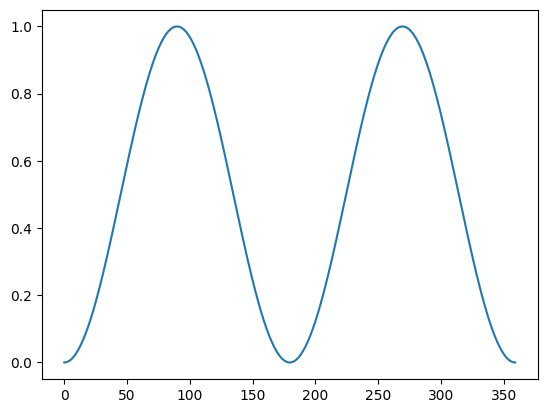

In [3]:
x = np.linspace(0, 2*np.pi, 360)
y = abs(np.sin(x))
z = 0.5*np.cos(2*x-np.pi)+0.5
plt.plot(z)
plt.show()

In [4]:
#data = '8449-1902' 
data = '10519-1901' 
#data = '11832-1902'

ellip = Bicone_Classifier.ellip_gen(data)

#for i in zero_l[1:-1]:
four_list = []
ten_list = []
for i in np.linspace(0.6, 2, 8):
    start, end = round(i,1), round(i,1)+0.3
    curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)

    #plt.plot(curve)
    result = Bicone_Classifier.fourier_classifier(curve)
    four_list.append(result[2])
    ten_list.append(result[4])

    #plt.plot(result[0])
    
plt.show()
print(sum(four_list), sum(ten_list))

DEBUG:marvin:local mode failed. Trying remote now.


3069 540.6040552494854


In [5]:
HEADER_PATH = '/Users/runquanguan/Documents/missed_compared.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

for data in plateifu:
    ellip = Bicone_Classifier.ellip_gen(data)

    #for i in zero_l[1:-1]:
    four_list = []
    ten_list = []
    for i in np.linspace(0.6, 2, 8):
        start, end = round(i,1), round(i,1)+0.3
        curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)

        result = Bicone_Classifier.fourier_classifier(curve)
        four_list.append(result[2])
        ten_list.append(result[4])

    print(sum(four_list), sum(ten_list))



DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.


2884 845.834457828332


DEBUG:marvin:local mode failed. Trying remote now.


2225 804.6367386838162


DEBUG:marvin:local mode failed. Trying remote now.


4081 612.0960643161268


KeyboardInterrupt: 

In [12]:
HEADER_PATH = '/Users/runquanguan/Documents/bicone_feature_compared.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']
    
    

    
four_summary = []
ten_summary = []

for data in plateifu:
    ellip = Bicone_Classifier.ellip_gen(data)

    #for i in zero_l[1:-1]:
    four_list = []
    ten_list = []
    for i in np.linspace(0.6, 2, 8):
        start, end = round(i,1), round(i,1)+0.3
        curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)

        result = Bicone_Classifier.fourier_classifier(curve)
        four_list.append(result[2])
        ten_list.append(result[4])

    four_summary.append(sum(four_list))
    ten_summary.append(sum(ten_list))




'''
if __name__ == '__main__':
    
    pool = Pool()                         # Create a multiprocessing Pool
    result = pool.map(fourier_inten, plateifu)
    pool.close()  
    pool.join()
'''

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

"\nif __name__ == '__main__':\n    \n    pool = Pool()                         # Create a multiprocessing Pool\n    result = pool.map(fourier_inten, plateifu)\n    pool.close()  \n    pool.join()\n"

In [18]:
diff_l = []
for i in range(len(four_summary)):
    if ten_summary[i] >= four_summary[i]:
        print(i)
    else: 
        diff = four_summary[i] - ten_summary[i]
        diff_l.append(diff)

In [20]:
# min(diff_l)
# 219.9672255600866

219.9672255600866

Now we sort it again using the new method to iterate the big list

In [22]:
PATH = '/Users/runquanguan/Documents/obvious_bicone_feature_position.fits'
hdul = fits.open(PATH)
hdu = hdul[1].data['plateifu']

   

    
four_summary = []
ten_summary = []

for data in hdu:
    ellip = Bicone_Classifier.ellip_gen(data)

    #for i in zero_l[1:-1]:
    four_list = []
    ten_list = []
    for i in np.linspace(0.6, 2, 8):
        start, end = round(i,1), round(i,1)+0.3
        curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)

        result = Bicone_Classifier.fourier_classifier(curve)
        four_list.append(result[2])
        ten_list.append(result[4])

    four_summary.append(sum(four_list))
    ten_summary.append(sum(ten_list))



DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.


In [23]:
diff_l = []
for i in range(len(four_summary)):
    if ten_summary[i] >= four_summary[i]:
        print(i)
    else: 
        diff = four_summary[i] - ten_summary[i]
        diff_l.append(diff)

In [24]:
min(diff_l)

624.7676501192466

# Scale it up

In [15]:
PATH = '/Users/runquanguan/Documents/excluded.fits'
hdul = fits.open(PATH)
hdu = hdul[1].data['plateifu']



In [20]:
def selection(data):
    ellip = Bicone_Classifier.ellip_gen(data)
    
    four_list = []
    ten_list = []

    for i in np.linspace(0.6, 2, 8):
        start, end = round(i,1), round(i,1)+0.3
        curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)
        result = Bicone_Classifier.fourier_classifier(curve)
        
        four_list.append(result[2])
        ten_list.append(result[4])

    if sum(four_list) - sum(ten_list) >= 219:
        return data
    else:
        pass



[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_feature_compared.fits' mode='rb' closefd=True> (ResourceWarning)
  waiters_to_notify = _deque(_islice(all_waiters, n))



In [22]:


if __name__ == '__main__':
    pool = mp.Pool(processes=4)

    results = []
    for result in pool.imap_unordered(selection, hdu):
        results.append(result)
       
    print(results)

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

['7443-1902', '7443-1901', '7443-3702', '7443-12704', '7443-3704', '7443-12701', '7443-3701', '7443-12705', '7443-6102', '7443-6104', None, '7443-3703', '7443-9101', '7443-6101', '7443-9102', '7443-12703', '7495-6103', '7443-12702', '7495-1901', '7495-1902', '7495-3704', '7495-3701', '7495-3702', '7495-12705', '7495-3703', '7495-6102', '7495-9101', '7495-6104', '7495-9102', '7495-6101', '7495-12704', '7495-12702', '7495-12701', '7495-12703', '7815-1901', '7815-3703', '7815-3704', '7815-3702', '7815-12704', '7815-3701', '7815-12705', '7815-6104', '7815-9102', '7815-6102', '7815-12703', '7815-6103', '7815-12702', '7815-1902', '7815-6101', '7815-9101', '7815-12701', '7991-1902', '7991-3701', '7991-3702', '7991-3704', '7991-3703', '7991-6104', '7991-6102', '7991-9102', '7991-9101', '7991-12705', '7991-12702', '7991-12704', '7991-12703', '7991-1901', '7991-12701', '7991-6103', '7991-6101', '7977-1902', '7977-3702', '7977-3704', '7977-3701', '7977-3703', '7977-6103', '7977-9101', '7977-9102'

In [24]:
results

['7443-1902',
 '7443-1901',
 '7443-3702',
 '7443-12704',
 '7443-3704',
 '7443-12701',
 '7443-3701',
 '7443-12705',
 '7443-6102',
 '7443-6104',
 None,
 '7443-3703',
 '7443-9101',
 '7443-6101',
 '7443-9102',
 '7443-12703',
 '7495-6103',
 '7443-12702',
 '7495-1901',
 '7495-1902',
 '7495-3704',
 '7495-3701',
 '7495-3702',
 '7495-12705',
 '7495-3703',
 '7495-6102',
 '7495-9101',
 '7495-6104',
 '7495-9102',
 '7495-6101',
 '7495-12704',
 '7495-12702',
 '7495-12701',
 '7495-12703',
 '7815-1901',
 '7815-3703',
 '7815-3704',
 '7815-3702',
 '7815-12704',
 '7815-3701',
 '7815-12705',
 '7815-6104',
 '7815-9102',
 '7815-6102',
 '7815-12703',
 '7815-6103',
 '7815-12702',
 '7815-1902',
 '7815-6101',
 '7815-9101',
 '7815-12701',
 '7991-1902',
 '7991-3701',
 '7991-3702',
 '7991-3704',
 '7991-3703',
 '7991-6104',
 '7991-6102',
 '7991-9102',
 '7991-9101',
 '7991-12705',
 '7991-12702',
 '7991-12704',
 '7991-12703',
 '7991-1901',
 '7991-12701',
 '7991-6103',
 '7991-6101',
 '7977-1902',
 '7977-3702',
 '7977-

In [25]:
new_result = []

for i in results:
    if i != None:
        new_result.append(i)

In [26]:
len(new_result)

10577

In [2]:
arr = np.array([1,2,3,4,5,6])
arr1 = np.array([7,8,9,0])
joint = np.concatenate((arr, arr1))
joint

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

As the result shows above, it did not work. 

Pipeline below is the old selection after half normalizations. 

# Phase Selection test


In [37]:
#np.linspace(0.4, 4.0, 19)
np.linspace(0.6, 2, 8)

array([0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

# Individual galaxy test

ellip = Bicone_Classifier.ellip_gen('7990-9102')
axis_loss = [] 

for i in np.linspace(0.4, 4.0, 19):
    start, end = round(i,1), round(i,1)+0.3 
    try:
        curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2, smooth = 5)
        plt.plot(curve)
        result = Bicone_Classifier.fourier_classifier(curve)

        #print(result[1][1])

        if result[1][1] == 3:
            axis_loss.append(result[4])
            #print(':' + str(result[4]))
        else:
            pass
    except:
        pass


#print(axis_loss)
total_axis_loss = sum(axis_loss)/len(axis_loss)
print(total_axis_loss)

plt.show()



In [44]:
# Small Batch Test 

HEADER_PATH = '/Users/runquanguan/Documents/missed_compared.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

axis_index = []


for data in tqdm(plateifu):
    ellip = Bicone_Classifier.ellip_gen(data)
    axis_loss = [] 

    for i in np.linspace(0.4, 4.0, 19):
        start, end = round(i,1), round(i,1)+0.3 
        try:
            curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2, smooth = 5)
            plt.plot(curve)
            result = Bicone_Classifier.fourier_classifier(curve)

            #print(result[1][1])

            if result[1][1] == 3:
                axis_loss.append(result[4])
                #print(':' + str(result[4]))
            else:
                pass
        except:
            pass

    total_axis_loss = sum(axis_loss)/len(axis_loss)
    axis_index.append(total_axis_loss)



        


 

 44%|████▍     | 8/18 [00:32<00:39,  3.94s/it][WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/missed_compared.fits' mode='rb' closefd=True> (ResourceWarning)
  inline_prefixes = {p: -1 for p in self._inline_comment_prefixes}

DEBUG:marvin:local mode failed. Trying remote now.
100%|██████████| 18/18 [01:14<00:00,  4.16s/it]


In [46]:
# Medium Batch Test

HEADER_PATH = '/Users/runquanguan/Documents/bicone_training_set.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

training = []
for i in plateifu:
    if len(i) >= 2:
        training.append(i)
len(training)

171

In [68]:
def axis_test(data):
    ellip = Bicone_Classifier.ellip_gen(data)
    axis_loss = [] 

    for i in np.linspace(0.4, 4.0, 19):
        start, end = round(i,1), round(i,1)+0.3 
        try:
            curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2, smooth = 2)
            plt.plot(curve)
            result = Bicone_Classifier.fourier_classifier(curve)

            #print(result[1][1])

            if result[1][1] == 3:
                axis_loss.append(result[4])
                #print(':' + str(result[4]))
            else:
                pass
        except:
            pass

    total_axis_loss = sum(axis_loss)/len(axis_loss)
    total_axis_loss <= 45
    
    
    
if __name__ == '__main__':
    pool = mp.Pool(processes=4)

    results = []
    for result in pool.imap_unordered(axis_test, training):
        results.append(result)
       
    print(results)

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.


[27.9, 6.875, 6.111111111111111, 5.416666666666667, 20.642857142857142, 15.88888888888889, 9.571428571428571, 10.833333333333334, 10.9, 10.833333333333334, 8.909090909090908, 27.285714285714285, 12.0, 29.357142857142858, 9.916666666666666, 23.23076923076923, 9.31578947368421, 18.77777777777778, 18.125, 13.0, 24.0, 27.3, 5.6, 22.25, 38.6, 10.444444444444445, 8.23076923076923, 9.636363636363637, 9.636363636363637, 31.75, 5.428571428571429, 7.888888888888889, 4.333333333333333, 43.93333333333333, 12.75, 7.090909090909091, 26.11111111111111, 9.2, 10.4, 25.4, 15.6, 15.166666666666666, 25.90909090909091, 25.90909090909091, 15.88888888888889, 3.111111111111111, 24.428571428571427, 3.111111111111111, 17.875, 12.0, 17.285714285714285, 10.75, 16.416666666666668, 16.0, 15.0, 21.357142857142858, 23.625, 11.833333333333334, 35.2, 7.909090909090909, 18.0, 16.416666666666668, 14.0, 11.4, 20.833333333333332, 21.071428571428573, 11.384615384615385, 16.923076923076923, 7.444444444444445, 16.923076923076

In [69]:
import copy
result_copy = copy.deepcopy(results)

In [73]:
result_copy

[2.8,
 3.111111111111111,
 3.111111111111111,
 3.2,
 4.125,
 4.333333333333333,
 5.230769230769231,
 5.416666666666667,
 5.428571428571429,
 5.6,
 5.909090909090909,
 5.909090909090909,
 6.0,
 6.090909090909091,
 6.111111111111111,
 6.875,
 6.9,
 7.0,
 7.0,
 7.090909090909091,
 7.444444444444445,
 7.545454545454546,
 7.875,
 7.888888888888889,
 7.888888888888889,
 7.909090909090909,
 8.23076923076923,
 8.461538461538462,
 8.833333333333334,
 8.846153846153847,
 8.909090909090908,
 9.2,
 9.2,
 9.222222222222221,
 9.31578947368421,
 9.454545454545455,
 9.571428571428571,
 9.636363636363637,
 9.636363636363637,
 9.666666666666666,
 9.916666666666666,
 10.11111111111111,
 10.166666666666666,
 10.4,
 10.444444444444445,
 10.6,
 10.75,
 10.833333333333334,
 10.833333333333334,
 10.875,
 10.9,
 11.181818181818182,
 11.25,
 11.375,
 11.384615384615385,
 11.4,
 11.545454545454545,
 11.777777777777779,
 11.833333333333334,
 11.846153846153847,
 12.0,
 12.0,
 12.222222222222221,
 12.5454545454545

In [74]:
result_copy.sort()
t_index = results.index(result_copy[-1])
training[t_index]

'11832-1902'

# Selection

In [75]:
#HEADER_PATH = '/Users/runquanguan/Documents/bicone_training_set.fits'
HEADER_PATH = '/Users/runquanguan/Documents/dapall_excluded.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

In [78]:


#fig, axes = plt.subplots (nrows=4, ncols=5,figsize =(12,11))

def half_norm_selection(data):
    ellip = Bicone_Classifier.ellip_gen(data)
    peak_loss = []
    axis_loss = [] 
    
    for i in np.linspace(0.4, 4.0, 19):
        start, end = round(i,1), round(i,1)+0.3
        try:
            curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2, smooth = 2)
            result = Bicone_Classifier.fourier_classifier(curve)



            if result[1][1] == 3:
                peak_loss.append(result[3][1]) #[3][1]: 4 Hz intensity
                axis_loss.append(result[4]) # [4]: angle residue
            else:
                pass
        except:
            pass
     
    if len(axis_loss) != 0:
        
        total_peak_loss = sum(peak_loss)
        total_axis_loss = sum(axis_loss)/len(axis_loss)

        if total_peak_loss >= 150 and total_axis_loss <= 45:
            return data
        else:
            pass
    else:
        pass


if __name__ == '__main__':
    pool = mp.Pool(processes=4)

    results = []
    for result in pool.imap_unordered(half_norm_selection, plateifu):
        results.append(result)
       
    print(results)

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_training_set.fits' mode='rb' closefd=True> (ResourceWarning)
  cls(buf, protocol).dump(obj)

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_training_set.fits' mode='rb' closefd=True> (ResourceWarning)
  inline_prefixes = {p: -1 for p in self._inline_comment_prefixes}

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode fai

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
  temp = (((i - min(arr))*diff)/diff_arr) + t_min

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marv

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

MarvinError: found a problem when checking if remote maps exists: Requests Timeout Error: HTTPSConnectionPool(host='dr17.sdss.org', port=443): Read timed out. (read timeout=300)
Your request took longer than 5 minutes and timed out. Please try again or simplify your request.
You can submit this error to Marvin GitHub Issues (https://github.com/sdss/marvin/issues/new).
Fill out a subject and some text describing the error that just occurred.
If able, copy and paste the full traceback information into the issue as well.
You can submit this error to Marvin GitHub Issues (https://github.com/sdss/marvin/issues/new).
Fill out a subject and some text describing the error that just occurred.
If able, copy and paste the full traceback information into the issue as well.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed.

In [81]:
washed = []

for i in results:
    if i != None:
        washed.append(i)

In [82]:
len(washed)

1709

In [83]:
c1 = fits.Column(name='plateifu', array=np.array(washed), format='20A')
#c2 = fits.Column(name='BiconeIndex', array=np.array(new_index), format='20A')
t = fits.BinTableHDU.from_columns([c1])
t.writeto('bicone_candidates_new_v2.fits')